<a href="https://colab.research.google.com/github/manmeet3/Deep_Learning/blob/master/homework_2_graded/Keras_categorical_crossentropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Categorical cross-entropy

In [0]:
import numpy as np
from matplotlib import pyplot

In [0]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


<function matplotlib.pyplot.show>

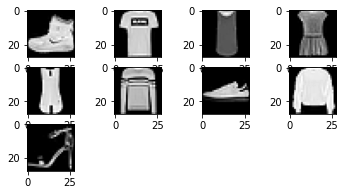

In [26]:
for i in range(9):
  pyplot.subplot(440 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

pyplot.show

In [0]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [0]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [0]:
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit(train_norm, y_train, epochs=10, batch_size=32, validation_data=(test_norm, y_test), verbose=0)
_, acc = model.evaluate(test_norm, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 90.570


In [0]:
history = history.history

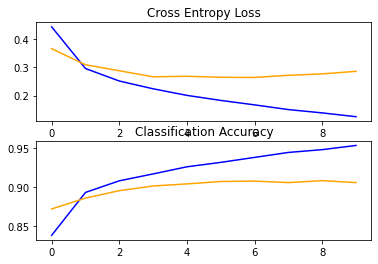

In [67]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history['loss'], color='blue', label='train')
pyplot.plot(history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history['accuracy'], color='blue', label='train')
pyplot.plot(history['val_accuracy'], color='orange', label='test')